In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
directory="F:\datasets\gestures"
gestures=["2fingures","fist","no gesture","palm","yo"]

In [4]:
images=[]
result=[]
for i in gestures:
    path=os.path.join(directory,i)
    for img in os.listdir(path):
        images.append(cv2.imread(os.path.join(path,img)))
        result.append(gestures.index(i))

In [5]:
os.path.join(path,img)

'F:\\datasets\\gestures\\yo\\999.jpg'

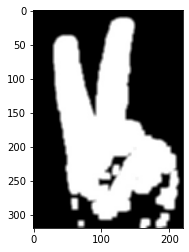

In [6]:
plt.imshow(images[490])

In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax')) 
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2
classifier.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('F:/datasets/gestures',
                                                 target_size=(64, 64),
                                                 batch_size=5,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('F:/datasets/gestures',
                                            target_size=(64, 64),
                                            batch_size=5,
                                            color_mode='grayscale',
                                            class_mode='categorical') 
classifier.fit_generator(
        training_set,
        steps_per_epoch=600, 
        epochs=15,
        validation_data=test_set,
        validation_steps=30)
model_json = classifier.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('model-bw.h5')
